#### Student Depression Logistic Regression
#### Name: Angel gabriel zuñiga peralta

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read Database

In [2]:
df = pd.read_csv('Student_depression_Dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [3]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [4]:
df = df.drop('id', axis=1)
df.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [5]:
df.isnull().sum()

Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [6]:
df.shape

(27901, 17)

In [7]:
df = df.dropna()
df.isna().sum()

Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [8]:
df['City'].value_counts()

City
Kalyan                1570
Srinagar              1372
Hyderabad             1339
Vasai-Virar           1290
Lucknow               1155
Thane                 1139
Ludhiana              1111
Agra                  1094
Surat                 1078
Kolkata               1065
Jaipur                1036
Patna                 1007
Visakhapatnam          969
Pune                   968
Ahmedabad              951
Bhopal                 934
Chennai                885
Meerut                 825
Rajkot                 816
Delhi                  768
Bangalore              767
Ghaziabad              745
Mumbai                 699
Vadodara               694
Varanasi               684
Nagpur                 651
Indore                 643
Kanpur                 609
Nashik                 547
Faridabad              461
Saanvi                   2
Bhavna                   2
City                     2
Harsha                   2
Less Delhi               1
M.Tech                   1
3.0                    

In [9]:
df['City'].value_counts()[df['City'].value_counts() < 400].sum()

np.int64(26)

In [10]:
### Removing cities with less than 400 students
common_cities = df['City'].value_counts()[df['City'].value_counts() >= 400].index
df = df[df['City'].isin(common_cities)]

In [11]:
df['City'].value_counts()

City
Kalyan           1570
Srinagar         1372
Hyderabad        1339
Vasai-Virar      1290
Lucknow          1155
Thane            1139
Ludhiana         1111
Agra             1094
Surat            1078
Kolkata          1065
Jaipur           1036
Patna            1007
Visakhapatnam     969
Pune              968
Ahmedabad         951
Bhopal            934
Chennai           885
Meerut            825
Rajkot            816
Delhi             768
Bangalore         767
Ghaziabad         745
Mumbai            699
Vadodara          694
Varanasi          684
Nagpur            651
Indore            643
Kanpur            609
Nashik            547
Faridabad         461
Name: count, dtype: int64

<Axes: >

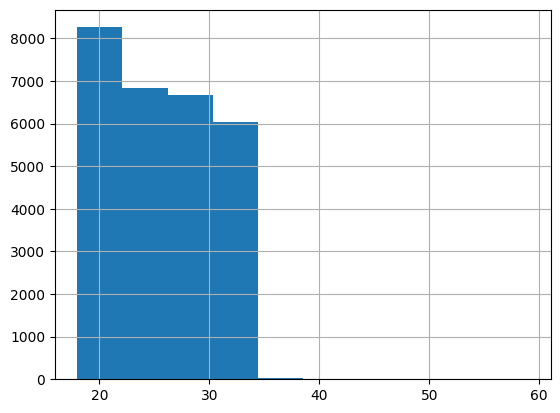

In [12]:
df.head()
df['Age'].hist()

<Axes: >

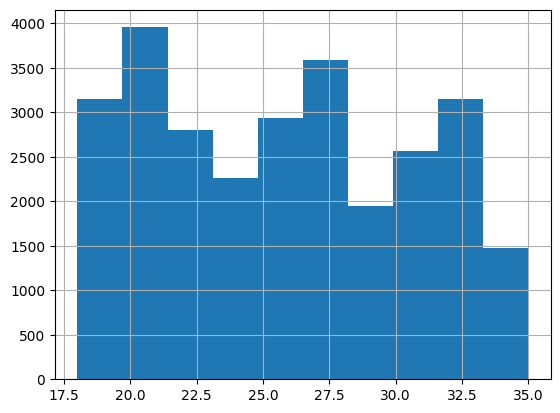

In [13]:
### Eliminate Outliers
df = df[df['Age'] <= 35]
df['Age'].hist()

In [14]:
df.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [15]:
### Profession data cleaning
df['Profession'].value_counts()
df = df.drop(['Profession'], axis=1)

In [16]:
df['Academic Pressure'].value_counts()

Academic Pressure
3.0    7444
5.0    6282
4.0    5149
1.0    4785
2.0    4166
0.0       7
Name: count, dtype: int64

In [17]:
df = df[df['Academic Pressure'] >= 2]
df['Academic Pressure'].value_counts()

Academic Pressure
3.0    7444
5.0    6282
4.0    5149
2.0    4166
Name: count, dtype: int64

In [18]:
##### Work preasure data cleaning
df['Work Pressure'].value_counts()
df = df.drop(['Work Pressure'], axis=1)
df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,5.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,2.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,3.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,3.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,4.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


<Axes: >

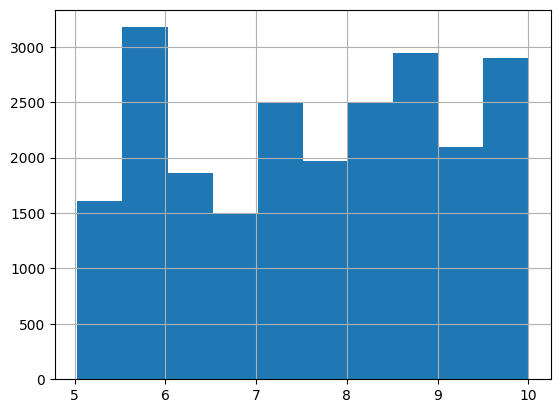

In [19]:
df = df[df['CGPA'] > 5]
df['CGPA'].hist()

In [20]:
df = df[df['Study Satisfaction'] >= 1]

In [21]:
df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,5.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,2.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,3.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,3.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,4.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [22]:
df['Job Satisfaction'].value_counts()

Job Satisfaction
0.0    23035
3.0        1
2.0        1
Name: count, dtype: int64

In [23]:
df =df.drop(['Job Satisfaction'], axis=1)
df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [24]:
df['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    6999
7-8 hours            6073
5-6 hours            5105
More than 8 hours    4842
Others                 18
Name: count, dtype: int64

In [25]:
#### Delete Others category
df = df.loc[df['Sleep Duration'] != 'Others']
df['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    6999
7-8 hours            6073
5-6 hours            5105
More than 8 hours    4842
Name: count, dtype: int64

In [26]:
#### Delete Other category on Dietary Habits
df = df.loc[df['Dietary Habits'] != 'Others']
df['Dietary Habits'].value_counts()

Dietary Habits
Unhealthy    8848
Moderate     8079
Healthy      6083
Name: count, dtype: int64

In [27]:
df['Degree'].value_counts()

Degree
Class 12    5338
B.Ed        1520
B.Com       1222
B.Arch      1198
BCA         1194
B.Tech       944
MSc          933
M.Tech       821
MCA          801
BHM          766
BSc          706
B.Pharm      673
M.Ed         661
M.Com        578
MBBS         565
BBA          563
LLB          542
BE           506
BA           479
M.Pharm      473
MA           460
MD           458
MBA          452
PhD          438
LLM          389
ME           158
MHM          143
Others        29
Name: count, dtype: int64

In [28]:
df['Have you ever had suicidal thoughts ?'].value_counts()

Have you ever had suicidal thoughts ?
Yes    15626
No      7384
Name: count, dtype: int64

In [29]:
df['Work/Study Hours'].value_counts()

Work/Study Hours
10.0    3612
12.0    2705
11.0    2456
8.0     2074
6.0     1865
9.0     1679
7.0     1622
4.0     1315
0.0     1264
2.0     1255
3.0     1180
5.0     1065
1.0      918
Name: count, dtype: int64

<Axes: >

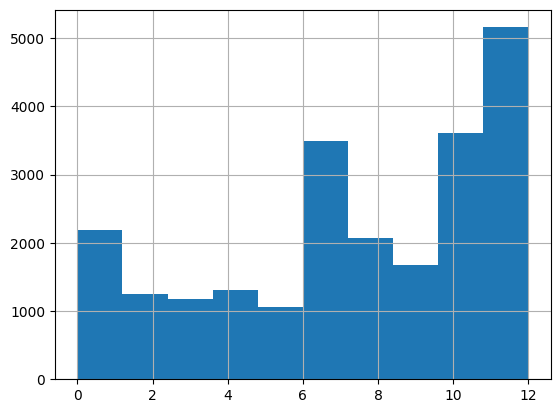

In [30]:
df['Work/Study Hours'].hist()

In [31]:
df['Financial Stress'].value_counts()

Financial Stress
5.0    5965
4.0    4935
3.0    4281
1.0    3939
2.0    3890
Name: count, dtype: int64

In [32]:
df['Family History of Mental Illness'].value_counts()

Family History of Mental Illness
No     11751
Yes    11259
Name: count, dtype: int64

In [33]:
df['Depression'].value_counts()

Depression
1    15356
0     7654
Name: count, dtype: int64

In [34]:
df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


#### Data Transformation

In [35]:
df['Sleep Duration'].value_counts()
df.loc[df['Sleep Duration'] == 'Less than 5 hours', 'Sleep Duration'] = 0
df.loc[df['Sleep Duration'] == '5-6 hours','Sleep Duration'] = 1
df.loc[df['Sleep Duration'] == '7-8 hours','Sleep Duration'] = 2
df.loc[df['Sleep Duration'] == 'More than 8 hours','Sleep Duration'] = 3
df['Sleep Duration'].value_counts()

Sleep Duration
0    6995
2    6072
1    5102
3    4841
Name: count, dtype: int64

In [36]:
## Changing diatary habits
df['Dietary Habits'].value_counts()
df.loc[df['Dietary Habits'] == 'Healthy', 'Dietary Habits'] = 0
df.loc[df['Dietary Habits'] == 'Unhealthy','Dietary Habits'] = 1
df.loc[df['Dietary Habits'] == 'Moderate','Dietary Habits'] = 2
df['Dietary Habits'].value_counts()

Dietary Habits
1    8848
2    8079
0    6083
Name: count, dtype: int64

In [37]:
df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,5.0,8.97,2.0,1,0,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,2.0,5.90,5.0,1,2,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,3.0,7.03,5.0,0,0,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,3.0,5.59,2.0,2,2,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,4.0,8.13,3.0,1,2,M.Tech,Yes,1.0,1.0,No,0


In [38]:
# Creating new degree column with
df.loc[df['Degree'].str.contains(r'Bsc|BCA|B.Ed|BHM|B.Pharm|B.Com|BE|B|LLB',regex = True), 'new_degree' ]= 'Graduated'
df.loc[df['Degree'].str.contains(r'Msc|LLM|M',regex = True), 'new_degree' ]= 'Post Graduated'
df.loc[df['Degree'] == 'Class 12','new_degree' ]= 'High school'
df = df.loc[df['Degree'] != 'Others']
df['new_degree'].value_counts()

new_degree
Graduated         9547
Post Graduated    7658
High school       5338
Name: count, dtype: int64

In [39]:
df.loc[df['new_degree'] == 'Graduated','new_degree'] = 0
df.loc[df['new_degree'] == 'Post Graduated','new_degree'] = 1
df.loc[df['new_degree'] == 'High school','new_degree'] = 2
df['new_degree'].value_counts()
df.fillna("Others")
df['new_degree'].value_counts()

C:\Users\Dilan\AppData\Local\Temp\ipykernel_3076\2704802699.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna("Others")


new_degree
0    9547
1    7658
2    5338
Name: count, dtype: int64

In [40]:
df = df[df['new_degree'] != 'nan']
df['new_degree'].value_counts()

new_degree
0    9547
1    7658
2    5338
Name: count, dtype: int64

In [41]:
df['Family History of Mental Illness'].head()
df.loc[df['Family History of Mental Illness'] == 'Yes','Family History of Mental Illness'] = 1
df.loc[df['Family History of Mental Illness'] == 'No','Family History of Mental Illness'] = 0
df['Family History of Mental Illness'].value_counts()


Family History of Mental Illness
0    11738
1    11243
Name: count, dtype: int64

In [42]:
df = df.drop(['Degree'], axis=1)

In [43]:
df['Gender'].head()
df.loc[df['Gender'] == 'Female','Gender'] = 1
df.loc[df['Gender'] == 'Male','Gender'] = 0
df['Gender'].value_counts()

Gender
0    12731
1    10250
Name: count, dtype: int64

In [44]:
df['Have you ever had suicidal thoughts ?'].head()
df.loc[df['Have you ever had suicidal thoughts ?'] == 'Yes','Have you ever had suicidal thoughts ?'] = 1
df.loc[df['Have you ever had suicidal thoughts ?'] == 'No','Have you ever had suicidal thoughts ?'] = 0
df['Have you ever had suicidal thoughts ?'].value_counts()

Have you ever had suicidal thoughts ?
1    15610
0     7371
Name: count, dtype: int64

In [45]:
df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,new_degree
0,0,33.0,Visakhapatnam,5.0,8.97,2.0,1,0,1,3.0,1.0,0,1,0
1,1,24.0,Bangalore,2.0,5.90,5.0,1,2,0,3.0,2.0,1,0,0
2,0,31.0,Srinagar,3.0,7.03,5.0,0,0,0,9.0,1.0,1,0,0
3,1,28.0,Varanasi,3.0,5.59,2.0,2,2,1,4.0,5.0,1,1,0
4,1,25.0,Jaipur,4.0,8.13,3.0,1,2,1,1.0,1.0,0,0,1


In [46]:
#### One Hot Encoding
df = pd.get_dummies(df, columns=['City'], drop_first=True)
df.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,...,City_Patna,City_Pune,City_Rajkot,City_Srinagar,City_Surat,City_Thane,City_Vadodara,City_Varanasi,City_Vasai-Virar,City_Visakhapatnam
0,0,33.0,5.0,8.97,2.0,1,0,1,3.0,1.0,...,False,False,False,False,False,False,False,False,False,True
1,1,24.0,2.0,5.90,5.0,1,2,0,3.0,2.0,...,False,False,False,False,False,False,False,False,False,False
2,0,31.0,3.0,7.03,5.0,0,0,0,9.0,1.0,...,False,False,False,True,False,False,False,False,False,False
3,1,28.0,3.0,5.59,2.0,2,2,1,4.0,5.0,...,False,False,False,False,False,False,False,True,False,False
4,1,25.0,4.0,8.13,3.0,1,2,1,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False


In [47]:
df.replace({False:0,True:1}, inplace=True)
df.head()

C:\Users\Dilan\AppData\Local\Temp\ipykernel_3076\930699413.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({False:0,True:1}, inplace=True)


,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,...,City_Patna,City_Pune,City_Rajkot,City_Srinagar,City_Surat,City_Thane,City_Vadodara,City_Varanasi,City_Vasai-Virar,City_Visakhapatnam
0,0,33.0,5.0,8.97,2.0,1,0,1,3.0,1.0,...,0,0,0,0,0,0,0,0,0,1
1,1,24.0,2.0,5.90,5.0,1,2,0,3.0,2.0,...,0,0,0,0,0,0,0,0,0,0
2,0,31.0,3.0,7.03,5.0,0,0,0,9.0,1.0,...,0,0,0,1,0,0,0,0,0,0
3,1,28.0,3.0,5.59,2.0,2,2,1,4.0,5.0,...,0,0,0,0,0,0,0,1,0,0
4,1,25.0,4.0,8.13,3.0,1,2,1,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

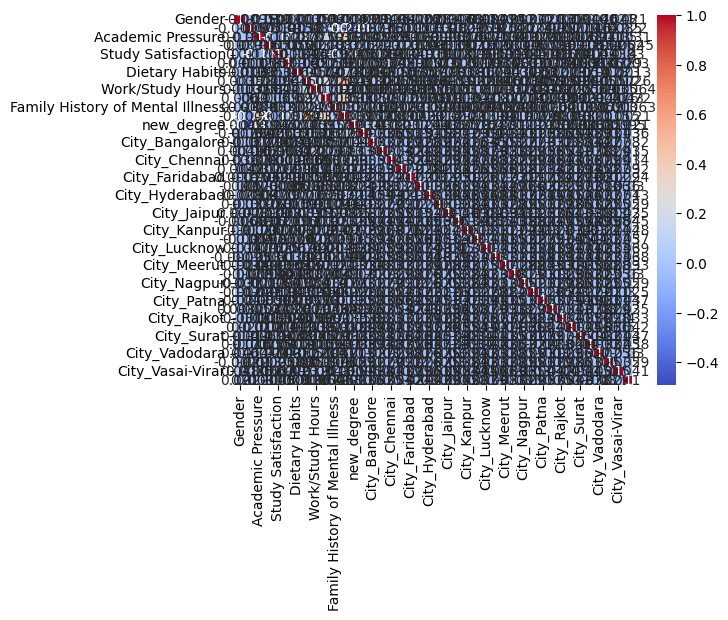

In [48]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

#### Logistics regression implementation

#### Scaling the data

In [49]:
df.describe()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,...,City_Patna,City_Pune,City_Rajkot,City_Srinagar,City_Surat,City_Thane,City_Vadodara,City_Varanasi,City_Vasai-Virar,City_Visakhapatnam
count,22981.000000,22981.000000,22981.000000,22981.000000,22981.000000,22981.000000,22981.000000,22981.000000,22981.000000,22981.000000,...,22981.000000,22981.000000,22981.000000,22981.000000,22981.000000,22981.000000,22981.000000,22981.000000,22981.000000,22981.000000
mean,0.446021,25.707933,3.588399,7.645291,2.932771,1.380532,1.086941,0.679257,7.276924,3.221183,...,0.037031,0.033593,0.031069,0.048823,0.037596,0.039163,0.024890,0.024368,0.047256,0.033506
std,0.497089,4.857990,1.072029,1.464173,1.361844,1.124481,0.779812,0.466772,3.667796,1.433934,...,0.188841,0.180183,0.173508,0.215502,0.190222,0.193986,0.155794,0.154192,0.212191,0.179957
min,0.000000,18.000000,2.000000,5.030000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,21.000000,3.000000,6.270000,2.000000,0.000000,0.000000,0.000000,4.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,25.000000,3.000000,7.770000,3.000000,1.000000,1.000000,1.000000,8.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,29.000000,5.000000,8.910000,4.000000,2.000000,2.000000,1.000000,10.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,35.000000,5.000000,10.000000,5.000000,3.000000,2.000000,1.000000,12.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
#Scale Age, Academic Preassure, CGPA, Study Satisfaction, Sleep Duration, Dietary Habits, Work/Study Hours, Financial Stress,
df.columns

Index(['Gender', 'Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction',
       'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression',
       'new_degree', 'City_Ahmedabad', 'City_Bangalore', 'City_Bhopal',
       'City_Chennai', 'City_Delhi', 'City_Faridabad', 'City_Ghaziabad',
       'City_Hyderabad', 'City_Indore', 'City_Jaipur', 'City_Kalyan',
       'City_Kanpur', 'City_Kolkata', 'City_Lucknow', 'City_Ludhiana',
       'City_Meerut', 'City_Mumbai', 'City_Nagpur', 'City_Nashik',
       'City_Patna', 'City_Pune', 'City_Rajkot', 'City_Srinagar', 'City_Surat',
       'City_Thane', 'City_Vadodara', 'City_Varanasi', 'City_Vasai-Virar',
       'City_Visakhapatnam'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

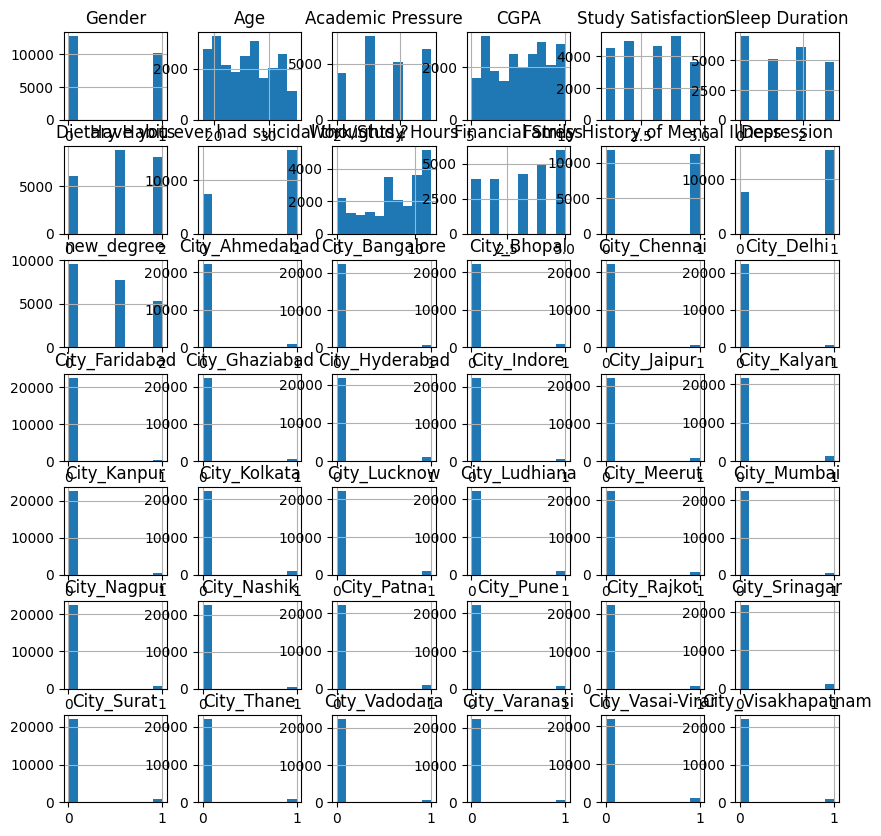

In [51]:
df.hist(figsize=(10,10))
plt.show

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('Depression',axis=1))

In [53]:
X_scaled_df = pd.DataFrame(X_scaled, columns=df.drop('Depression',axis=1).columns)
X_scaled_df

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,...,City_Patna,City_Pune,City_Rajkot,City_Srinagar,City_Surat,City_Thane,City_Vadodara,City_Varanasi,City_Vasai-Virar,City_Visakhapatnam
0,-0.897286,1.501079,1.316785,0.904768,-0.684947,-0.338414,-1.393881,0.687166,-1.166100,-1.549047,...,-0.196098,-0.186442,-0.179068,-0.226559,-0.197649,-0.201889,-0.159767,-0.158040,-0.222711,5.370796
1,1.114472,-0.351579,-1.481708,-1.192024,1.517997,-0.338414,1.170896,-1.455252,-1.166100,-0.851649,...,-0.196098,-0.186442,-0.179068,-0.226559,-0.197649,-0.201889,-0.159767,-0.158040,-0.222711,-0.186192
2,-0.897286,1.089377,-0.548877,-0.420240,1.517997,-1.227732,-1.393881,-1.455252,0.469795,-1.549047,...,-0.196098,-0.186442,-0.179068,4.413862,-0.197649,-0.201889,-0.159767,-0.158040,-0.222711,-0.186192
3,1.114472,0.471824,-0.548877,-1.403752,-0.684947,0.550904,1.170896,0.687166,-0.893451,1.240542,...,-0.196098,-0.186442,-0.179068,-0.226559,-0.197649,-0.201889,-0.159767,6.327519,-0.222711,-0.186192
4,1.114472,-0.145729,0.383954,0.331053,0.049368,-0.338414,1.170896,0.687166,-1.711399,-1.549047,...,-0.196098,-0.186442,-0.179068,-0.226559,-0.197649,-0.201889,-0.159767,-0.158040,-0.222711,-0.186192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22976,1.114472,0.265973,1.316785,-1.294473,1.517997,-0.338414,-0.111493,0.687166,-0.075503,-1.549047,...,-0.196098,-0.186442,-0.179068,-0.226559,5.059484,-0.201889,-0.159767,-0.158040,-0.222711,-0.186192
22977,-0.897286,0.265973,-1.481708,1.198456,0.049368,-1.227732,-1.393881,-1.455252,-1.984048,-0.154252,...,-0.196098,-0.186442,-0.179068,-0.226559,-0.197649,-0.201889,-0.159767,-0.158040,-0.222711,-0.186192
22978,-0.897286,1.089377,-0.548877,-0.707098,0.783682,-0.338414,-0.111493,-1.455252,1.287743,-0.851649,...,-0.196098,-0.186442,-0.179068,-0.226559,-0.197649,-0.201889,-0.159767,-0.158040,-0.222711,-0.186192
22979,1.114472,-1.586685,1.316785,-0.522690,-0.684947,-1.227732,-1.393881,0.687166,0.742444,1.240542,...,-0.196098,-0.186442,-0.179068,-0.226559,-0.197649,-0.201889,-0.159767,-0.158040,-0.222711,-0.186192


<function matplotlib.pyplot.show(close=None, block=None)>

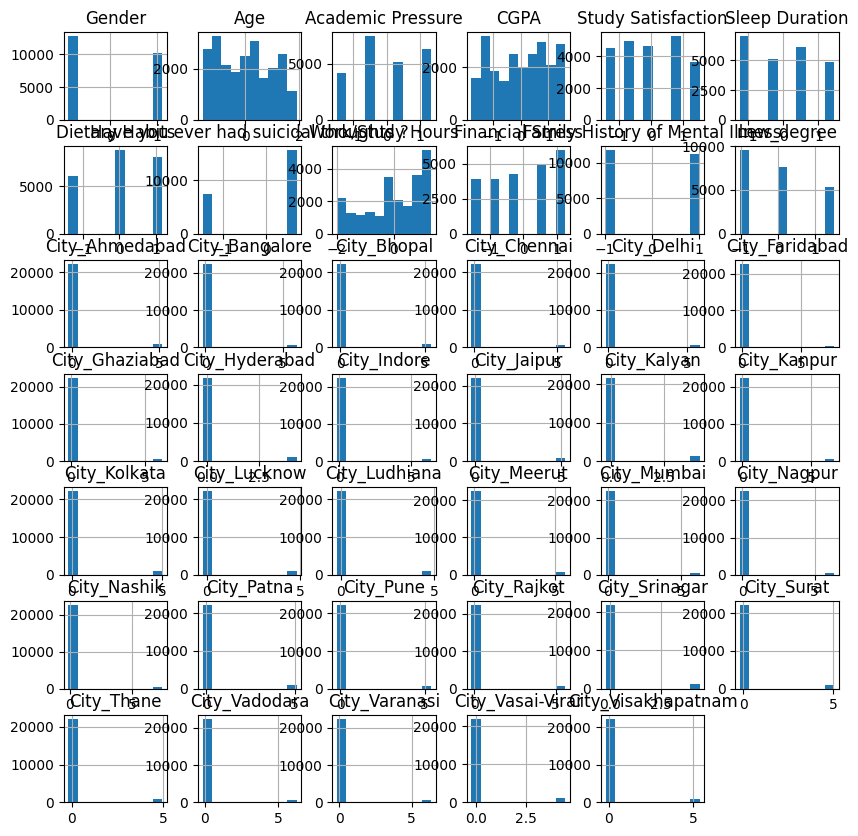

In [54]:
X_scaled_df.hist(figsize=(10,10))
plt.show

#### Split the dataset

In [69]:
X = X_scaled_df
y = df['Depression']
print("NaNs en X:", X.isnull().sum().sum())
print("NaNs en y:", y.isnull().sum())


NaNs en X: 438
NaNs en y: 0


In [66]:
# Concatenar X y y para eliminar filas con NaN en conjunto
df_model = pd.concat([X_scaled_df, y], axis=1)

# Eliminar filas con valores faltantes
df_model = df_model.dropna()

# Separar X y y ya limpios
X = df_model.drop('Depression', axis=1)
y = df_model['Depression']

# Comprobar que no hay NaNs
print("NaNs en X:", X.isnull().sum().sum())
print("NaNs en y:", y.isnull().sum())



NaNs en X: 0
NaNs en y: 0


In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Logistics Regression Training

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


#### Evaluate the model

In [59]:
#### Evaluate the model
y_pred = model.predict(X_train)

In [60]:
accuracy_score(y_train,y_pred)

0.6700593723494487

<Axes: >

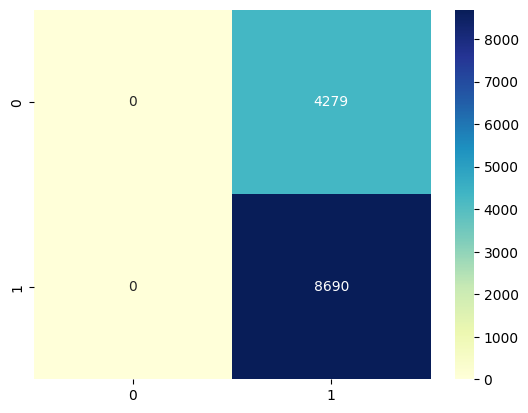

In [62]:
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt='d', cmap='YlGnBu')


In [64]:
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.6583917970858068

<Axes: >

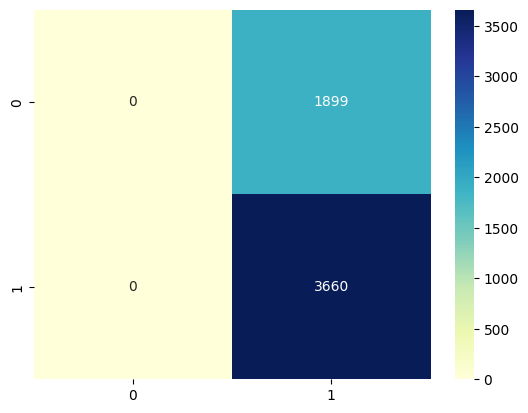

In [65]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu')